In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
# Define your directory path
data_dir = '/content/drive/MyDrive/Advanced Computer Vision/Assignments/Final Project/Data/aircrafts_data/crop'

## Explore Images and View Samples

In [17]:




# Create an empty DataFrame to store class names and image counts
data = {'Class Name': [], 'Image Count': []}
df = pd.DataFrame(data)

# Define the number of sample images to load from each class
num_samples = 1

# Walk through the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Count the number of images in the current class directory
        num_images = len([file for file in os.listdir(class_dir) if file.endswith(('jpg', 'jpeg', 'png'))])
        df = df.append({'Class Name': class_name, 'Image Count': num_images}, ignore_index=True)

        # Load sample images
        sample_images = []
        for file in os.listdir(class_dir):
            if file.endswith(('jpg', 'jpeg', 'png')) and len(sample_images) < num_samples:
                image_path = os.path.join(class_dir, file)
                try:
                    image = Image.open(image_path)
                    sample_images.append(image)
                except Exception as e:
                    print(f"Error loading image {file}: {str(e)}")
            # Display sample images
        if sample_images:
            print(f"Sample Images from {class_name}:")
            plt.figure(figsize=(10, 4))
            for i, img in enumerate(sample_images):
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img)
                plt.title(f"Sample {i + 1}")
                plt.axis('off')
            plt.show()






Output hidden; open in https://colab.research.google.com to view.

Images are of different sizes and resolution will need to standerdize size for the model. There are also some very blurry images

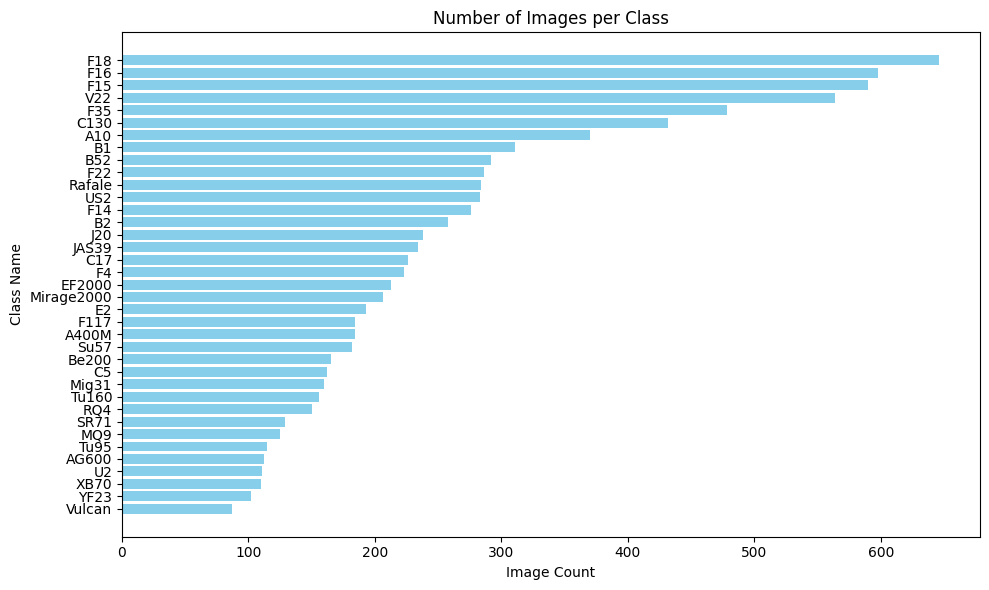

In [12]:
df = df.sort_values(by='Image Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df['Class Name'], df['Image Count'], color='skyblue')
plt.xlabel('Image Count')
plt.ylabel('Class Name')
plt.title('Number of Images per Class')
plt.gca().invert_yaxis()  # Invert y-axis to display the classes in descending order
plt.tight_layout()
plt.show()

May need to do some filtering of classes given data size, perhaps we should only keep classes that are over 200 records


## Filter Down

In [13]:
df_filtered = df[df['Image Count']>200]

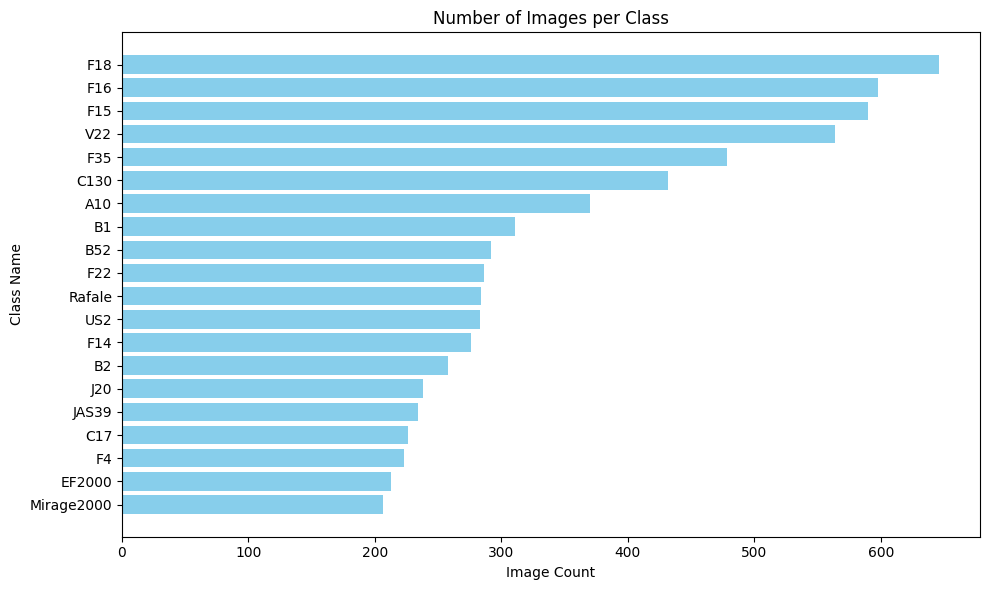

In [14]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_filtered['Class Name'], df_filtered['Image Count'], color='skyblue')
plt.xlabel('Image Count')
plt.ylabel('Class Name')
plt.title('Number of Images per Class')
plt.gca().invert_yaxis()  # Invert y-axis to display the classes in descending order
plt.tight_layout()
plt.show()

THere is still potential for imbalance here, but we are down to 20 classes which is a lot more manageable.


## Sample Image Exploration

<ipython-input-20-24b410f9f124>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Class Name': class_name,
<ipython-input-20-24b410f9f124>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Class Name': class_name,
<ipython-input-20-24b410f9f124>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Class Name': class_name,
<ipython-input-20-24b410f9f124>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Class Name': class_name,
<ipython-input-20-24b410f9f124>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

Imbalanced Classes: ['E2', 'F117', 'A400M', 'Su57', 'Be200', 'C5', 'Mig31', 'Tu160', 'RQ4', 'SR71', 'MQ9', 'Tu95', 'AG600', 'U2', 'XB70', 'YF23', 'Vulcan']


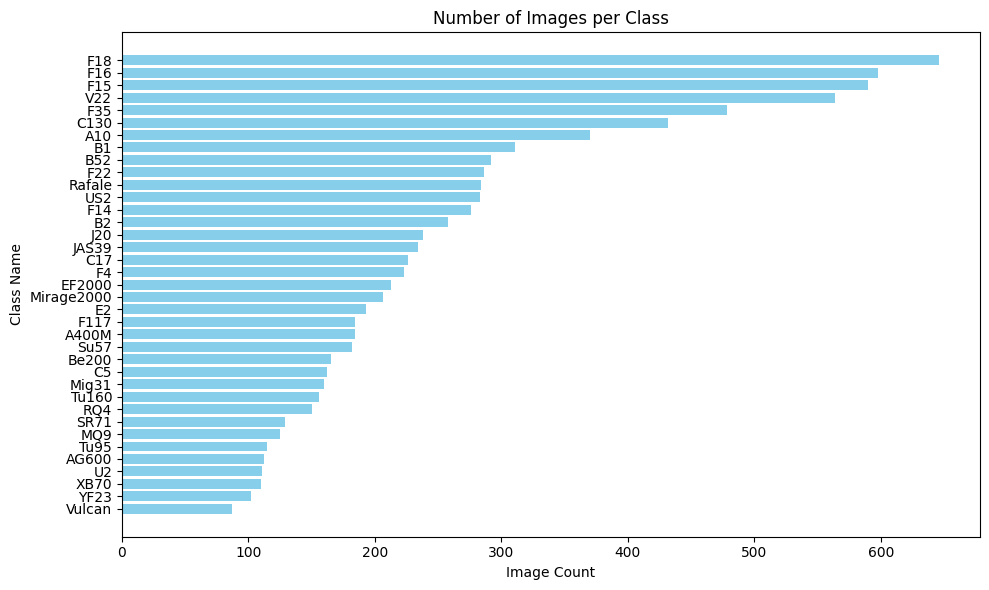

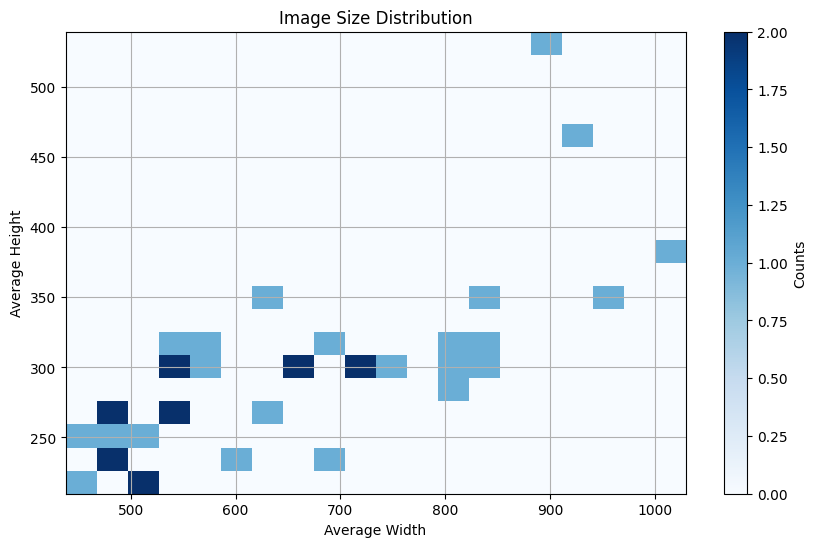

In [20]:

# Create an empty DataFrame to store class names and image counts
data = {'Class Name': [], 'Image Count': [], 'Average Width': [], 'Average Height': []}
df = pd.DataFrame(data)

# Define the number of sample images to load from each class
num_samples = 1

# Walk through the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Count the number of images in the current class directory
        num_images = len([file for file in os.listdir(class_dir) if file.endswith(('jpg', 'jpeg', 'png'))])

        # Compute image size statistics
        image_sizes = []
        for file in os.listdir(class_dir):
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(class_dir, file)
                try:
                    image = Image.open(image_path)
                    width, height = image.size
                    image_sizes.append((width, height))
                except Exception as e:
                    print(f"Error loading image {file}: {str(e)}")

        # Compute average image width and height
        avg_width = np.mean([size[0] for size in image_sizes])
        avg_height = np.mean([size[1] for size in image_sizes])

        df = df.append({'Class Name': class_name,
                        'Image Count': num_images,
                        'Average Width': avg_width,
                        'Average Height': avg_height},
                        ignore_index=True)

# Sort the DataFrame in descending order based on 'Image Count'
df = df.sort_values(by='Image Count', ascending=False)

# Check for class imbalance (you can set your threshold)
imbalance_threshold = 200
imbalanced_classes = df[df['Image Count'] < imbalance_threshold]['Class Name'].tolist()

print("Imbalanced Classes:", imbalanced_classes)

# Create a bar plot for image count
plt.figure(figsize=(10, 6))
plt.barh(df['Class Name'], df['Image Count'], color='skyblue')
plt.xlabel('Image Count')
plt.ylabel('Class Name')
plt.title('Number of Images per Class')
plt.gca().invert_yaxis()  # Invert y-axis to display the classes in descending order
plt.tight_layout()
plt.show()

# Visualize image size distribution
plt.figure(figsize=(10, 6))
plt.hist2d(df['Average Width'], df['Average Height'], bins=20, cmap='Blues')
plt.colorbar(label='Counts')
plt.xlabel('Average Width')
plt.ylabel('Average Height')
plt.title('Image Size Distribution')
plt.grid(True)
plt.show()


Pretty wide array of distribution here so resizing will definitley be needed